In [1]:
#importing the necessary libraries
import tensorflow as tf
import gc
from tensorflow import keras
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from datetime import datetime 
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [3]:
#loading the dataset
file = tf.keras.utils
df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')

In [4]:
#checking the dataset
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
#Checking the transactions which are fraud
df[df["Class"] == 1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [6]:
#shows the 5 rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
#describes the column
df.describe

<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599

In [8]:
column_list = (list(df.columns))
print(column_list)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [9]:
#observe the different feature type present in the data

print("=============================================")
print("Data types of the columns in the data frame:", df.dtypes)
print("=============================================")
print("Shape of the data frame:", df.shape)
print("=============================================")
print("Information about the data frame:", df.info())
df.head()

Data types of the columns in the data frame: Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
Shape of the data frame: (284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
#checking the missing values
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [11]:
#showing the balance of the datasets as a fraction
neg, pos = np.bincount(df['Class'])
total = neg + pos
print(' Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))
print(' Total: {}\n    Negative: {} ({:.2f}% of total)\n'.format(
    total, neg, 100 * neg / total))

 Total: 284807
    Positive: 492 (0.17% of total)

 Total: 284807
    Negative: 284315 (99.83% of total)



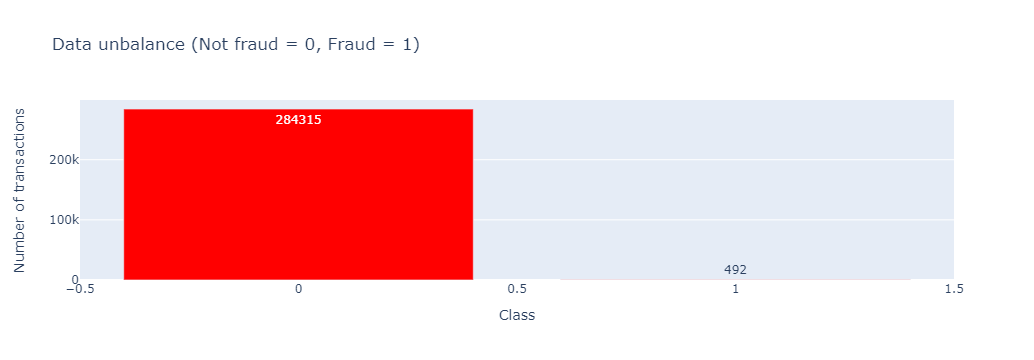

In [12]:
#showing the balance of the dataset in a bar chart
temp = df["Class"].value_counts()
df_1 = pd.DataFrame({'Class': temp.index,'values': temp.values})

trace = go.Bar(
    x = df_1['Class'],y = df_1['values'],
    name="Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)",
    marker=dict(color="Red"),
    text=df_1['values']
)
data = [trace]
layout = dict(title = 'Data unbalance (Not fraud = 0, Fraud = 1)',
          xaxis = dict(title = 'Class', showticklabels=True), 
          yaxis = dict(title = 'Number of transactions'),
          hovermode = 'closest',width=600
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='class')

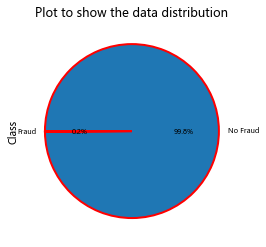

In [13]:
#showing the data distribution in a pie chart
ca1 = df['Class'].value_counts()
ca1 = ca1.set_axis(['No Fraud','Fraud'], axis="index")

plt.rcParams['font.sans-serif'] =['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False


plt.axes(aspect = 'equal')


ca1.plot(kind = 'pie', 
            autopct='%.1f%%', 
            radius = 1, 
            startangle = 180, 
            counterclock = False, 
            title = 'Plot to show the data distribution', 
            wedgeprops = {'linewidth': 2, 'edgecolor':'red'}, 
            textprops = {'fontsize':7, 'color':'black'} 
        )

plt.show()

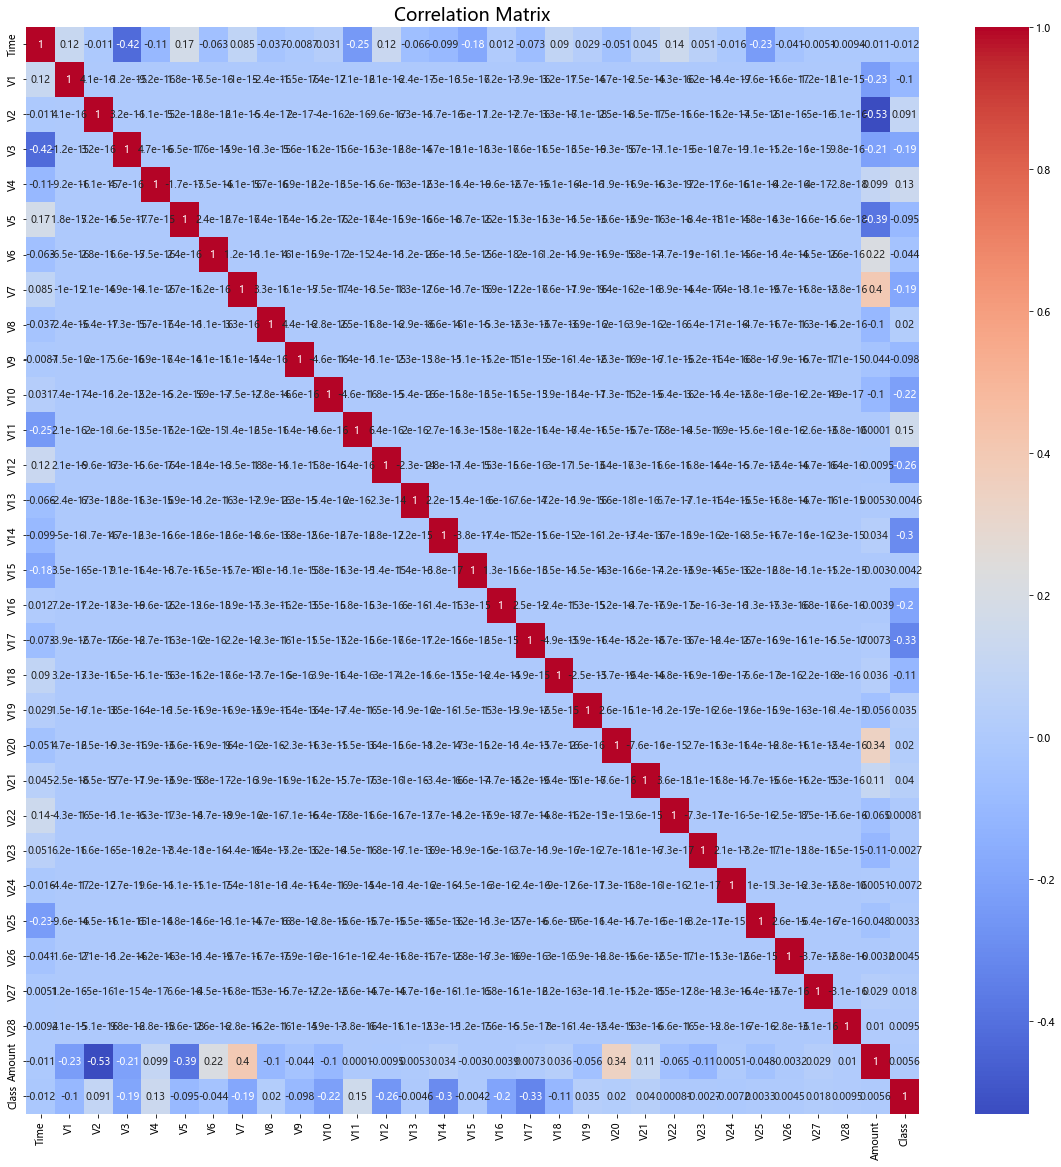

In [14]:
#getting the correlation matrix
def plot_correlation_matrix(data, title='Correlation Matrix'):
    corr = data.corr()
    plt.figure(figsize=(20, 20))
    sns.heatmap(corr, annot=True, cmap="coolwarm")
    plt.title(title, fontsize=18)
    plt.show()

plot_correlation_matrix(df)

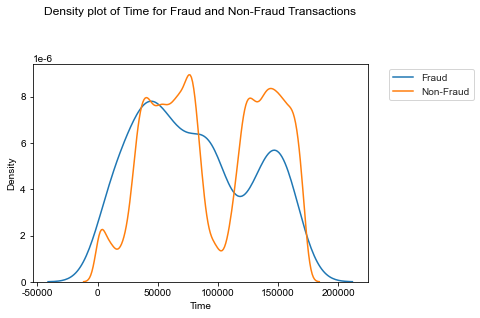

In [15]:
# Separate the data into fraud and non-fraud transactions
fraud_data = df[df["Class"] == 1]
non_fraud_data = df[df['Class'] == 0]

# Create density plots for fraud and non-fraud transactions
sns.kdeplot(fraud_data['Time'], label='Fraud', shade=False, )
sns.kdeplot(non_fraud_data['Time'], label='Non-Fraud', shade=False)
sns.set_style('whitegrid')
plt.title('Density plot of Time for Fraud and Non-Fraud Transactions',y =1.2)
plt.xlabel('Time')
plt.ylabel('Density')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [16]:
#normalizing the data
cleaned_df=df.copy()
scaler = StandardScaler() 
cleaned_df['amount_scaled'] = scaler.fit_transform(cleaned_df['Amount'].values.reshape(-1,1))

# Since The `Amount' column covers a huge range. Lets Convert into to a log-space.
cleaned_df['amount_log'] = np.log(cleaned_df.Amount + 0.0001)

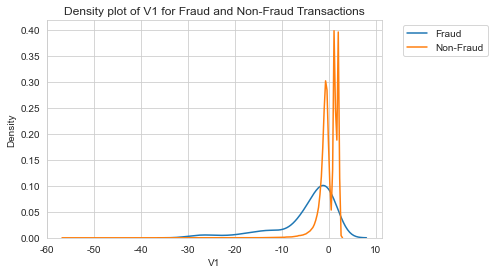

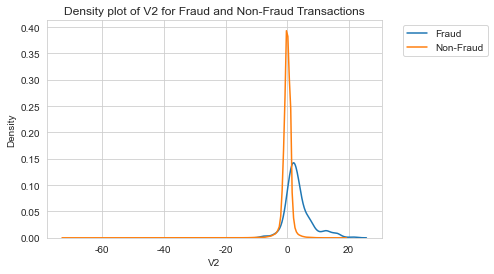

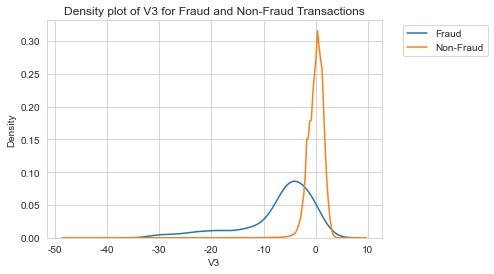

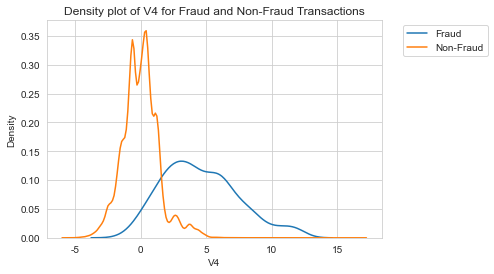

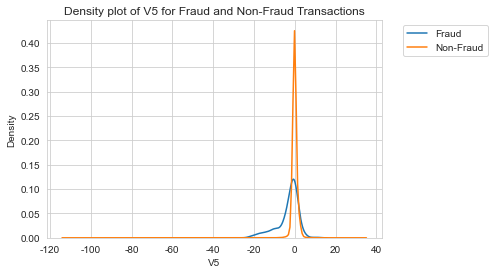

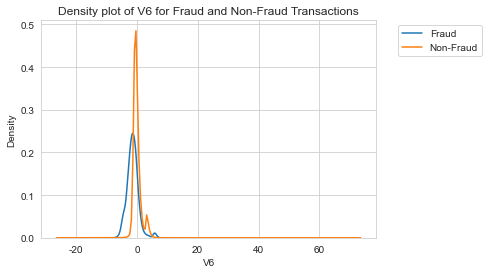

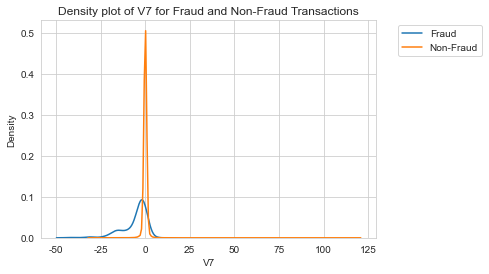

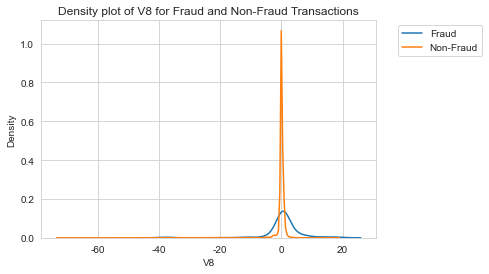

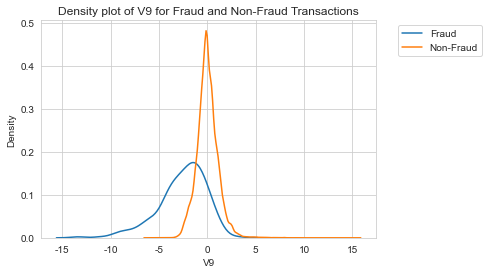

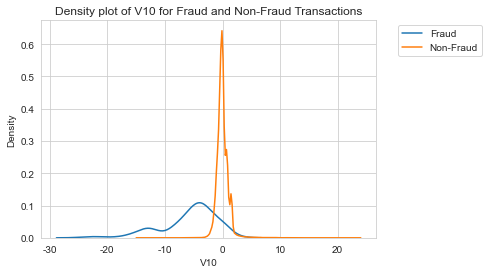

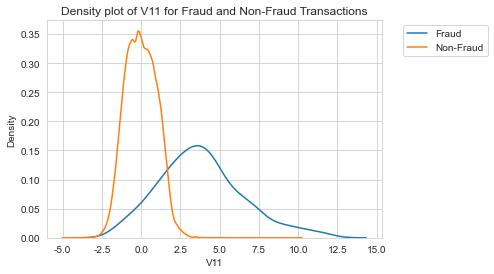

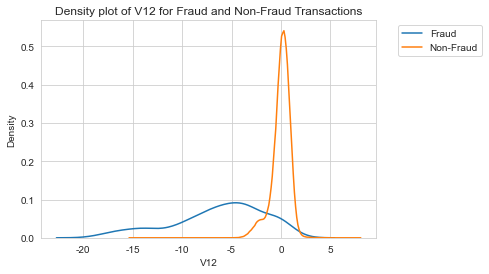

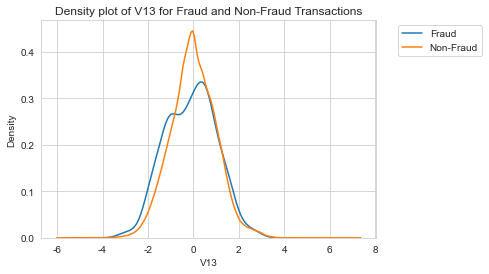

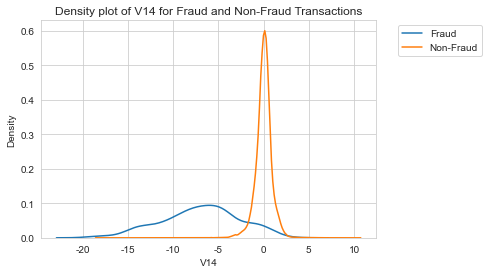

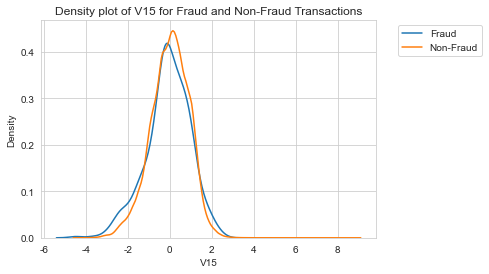

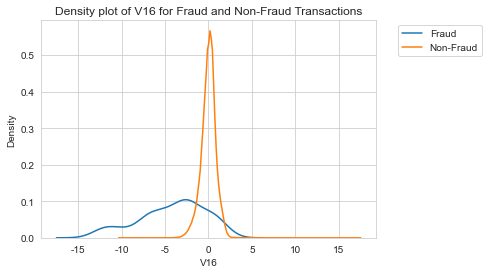

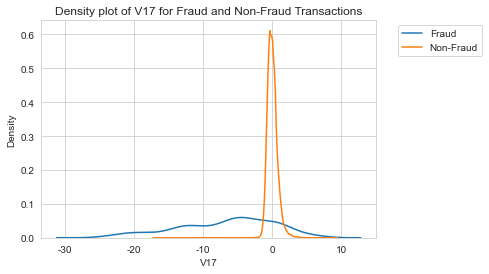

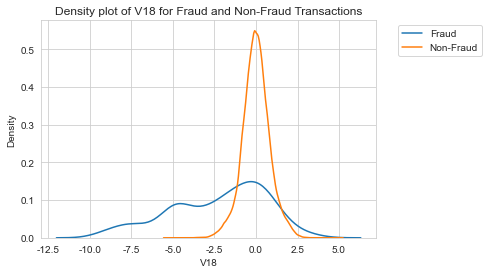

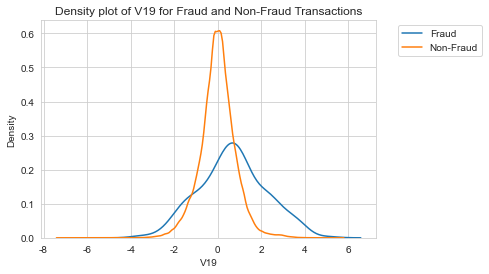

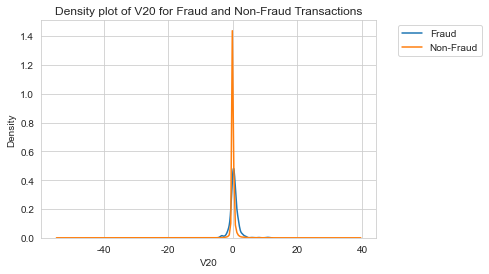

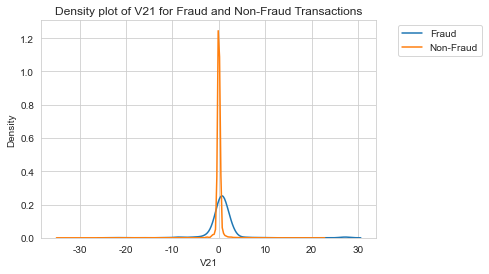

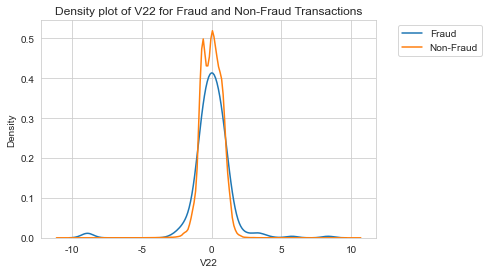

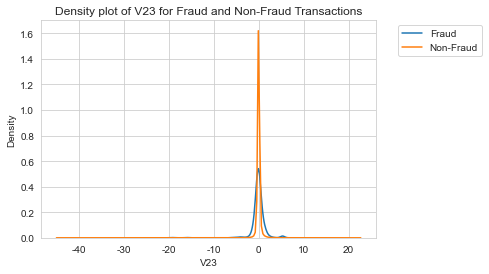

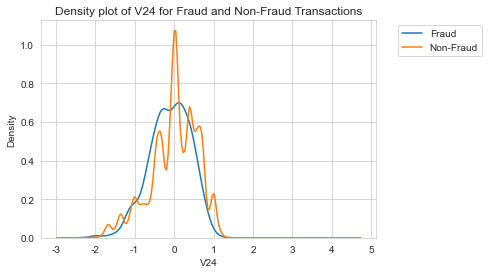

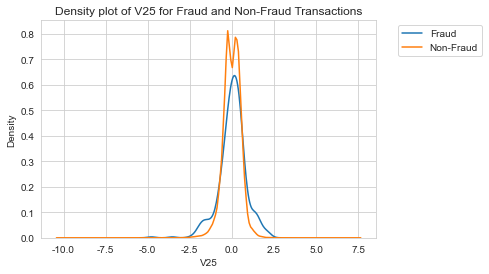

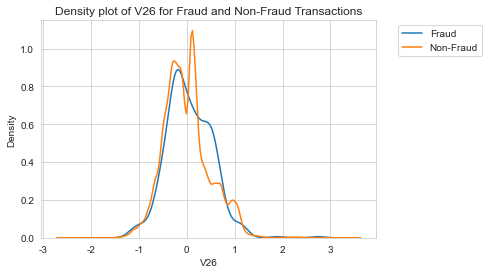

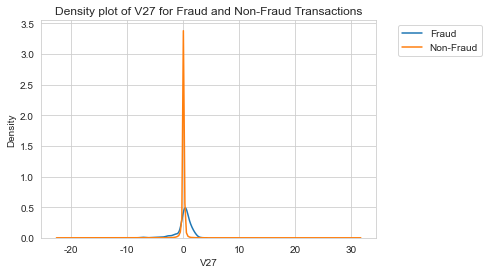

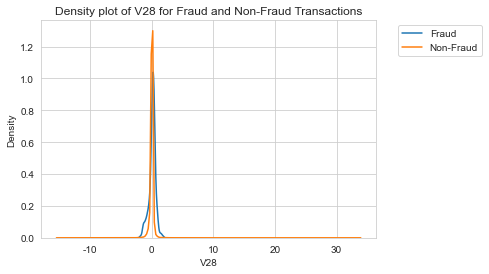

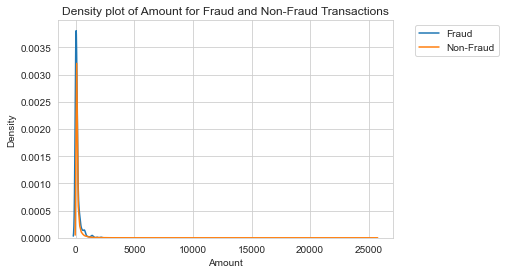

In [17]:
# Separate the data into fraud and non-fraud transactions
fraud_data = df[df['Class'] == 1]
non_fraud_data = df[df['Class'] == 0]

# Remove features with zero variance
variance = df.var()
features_to_remove = [col for col in variance.index if variance[col] == 0]
df = df.drop(columns=features_to_remove)

# Get feature names, excluding the target variable 'Class'and 'Time'
features = [col for col in df.columns if col != 'Class']
features = [col for col in features if col != 'Time']

 
# Create a density plot for each feature
for feature in features:
    plt.figure()  # Create a new figure for each plot

    sns.kdeplot(fraud_data[feature], label='Fraud', shade=False, warn_singular=False)
    sns.kdeplot(non_fraud_data[feature], label='Non-Fraud', shade=False,warn_singular=False)
    sns.set_style('whitegrid')
    plt.title(f'Density plot of {feature} for Fraud and Non-Fraud Transactions')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

In [20]:
#converting seconds into hours

df['Hour'] = df['Time'].apply(lambda x: np.floor(x / 3600))

#creating new features by using the 'Hour'
df_1 = df.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df_2 = pd.DataFrame(df_1)
df_2.columns = ['Hour', 'Class', 'Minimum', 'Maximum', 'Transactions', 'Sum', 'Mean', 'Median', 'Variance']
df_2.head()

,Hour,Class,Minimum,Maximum,Transactions,Sum,Mean,Median,Variance
0,0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


In [21]:
print(df_2)

    Hour  Class  Minimum   Maximum  Transactions        Sum        Mean  \
0    0.0      0     0.00   7712.43          3961  256572.87   64.774772   
1    0.0      1     0.00    529.00             2     529.00  264.500000   
2    1.0      0     0.00   1769.69          2215  145806.76   65.826980   
3    1.0      1    59.00    239.93             2     298.93  149.465000   
4    2.0      0     0.00   4002.88          1555  106989.39   68.803466   
..   ...    ...      ...       ...           ...        ...         ...   
89  45.0      1    12.31     39.98             2      52.29   26.145000   
90  46.0      0     0.00  25691.16          6458  449369.58   69.583397   
91  46.0      1     0.00    634.30             6    1433.23  238.871667   
92  47.0      0     0.00  10199.44          4852  333212.69   68.675328   
93  47.0      1     0.76    245.00             4     366.18   91.545000   

     Median       Variance  
0    12.990   45615.821201  
1   264.500  139920.500000  
2    22.820 

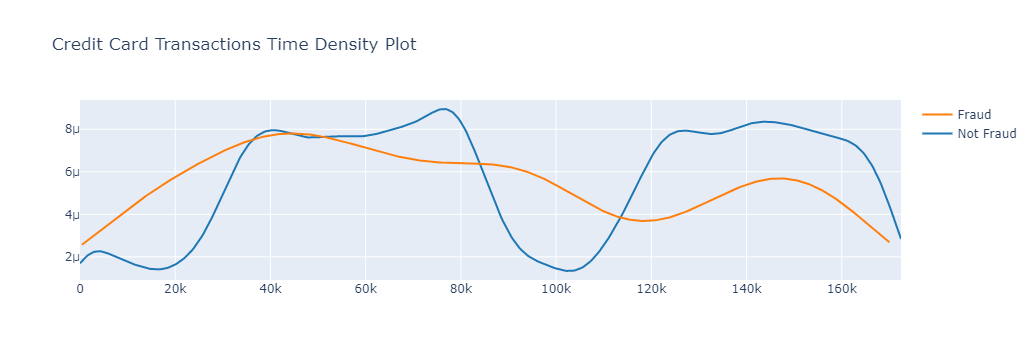

In [22]:
#creating a time density plot to show the transactions
class_0 = df.loc[df['Class'] == 0]["Time"]
class_1 = df.loc[df['Class'] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot')
iplot(fig, filename='dist_only')

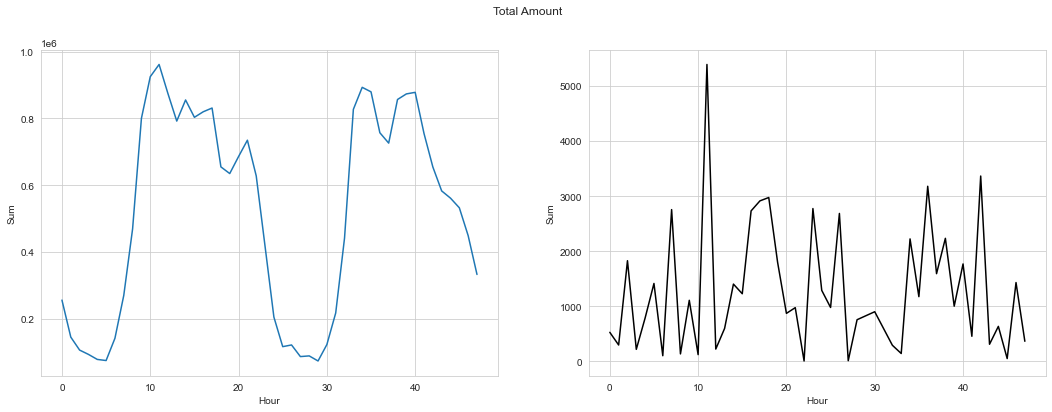

In [23]:
#plot to show the totaL amount of fraud and non fraud transactions
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Sum", data=df_2.loc[df_2.Class==0],)
s = sns.lineplot(ax = ax2, x="Hour", y="Sum", data=df_2.loc[df_2.Class==1], color="black")
plt.suptitle("Total Amount")
plt.show()

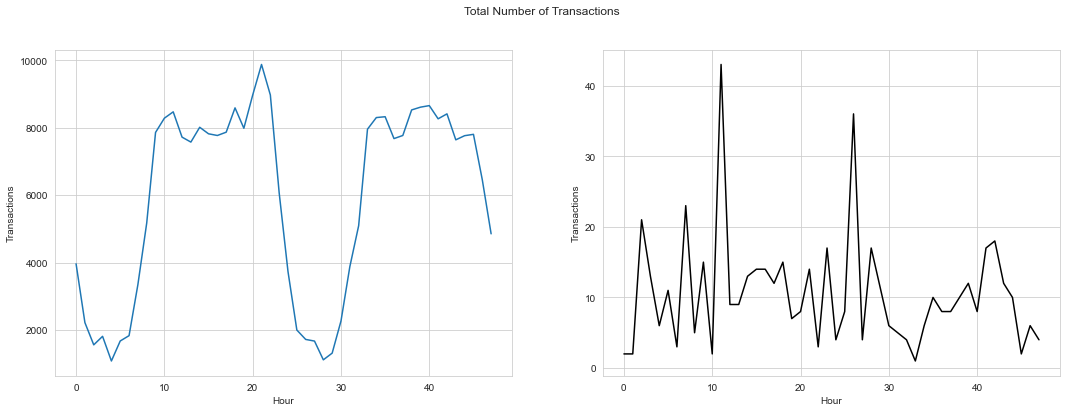

In [24]:
#plotting the total number of transactions
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Transactions", data=df_2.loc[df_2.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Transactions", data=df_2.loc[df_2.Class==1], color="black")
plt.suptitle("Total Number of Transactions")
plt.show()

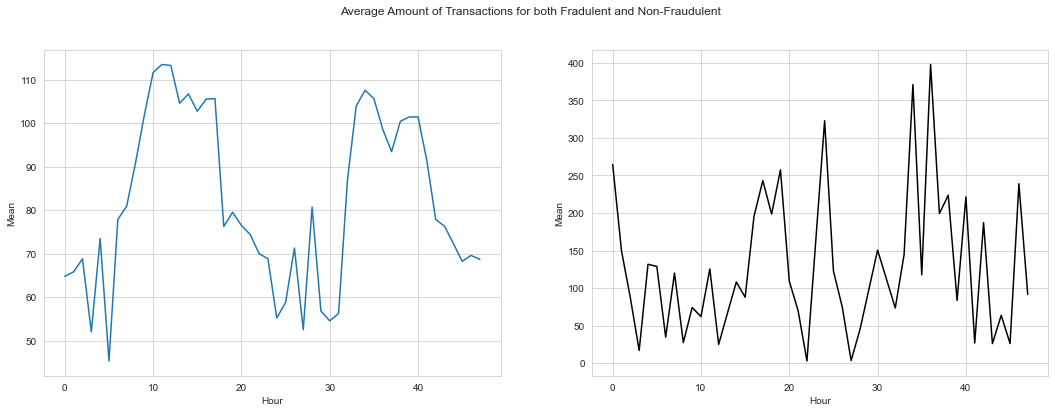

In [25]:
#plotting the average amount of transactions
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Mean", data=df_2.loc[df_2.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Mean", data=df_2.loc[df_2.Class==1], color="black")
plt.suptitle("Average Amount of Transactions for both Fradulent and Non-Fraudulent")
plt.show();

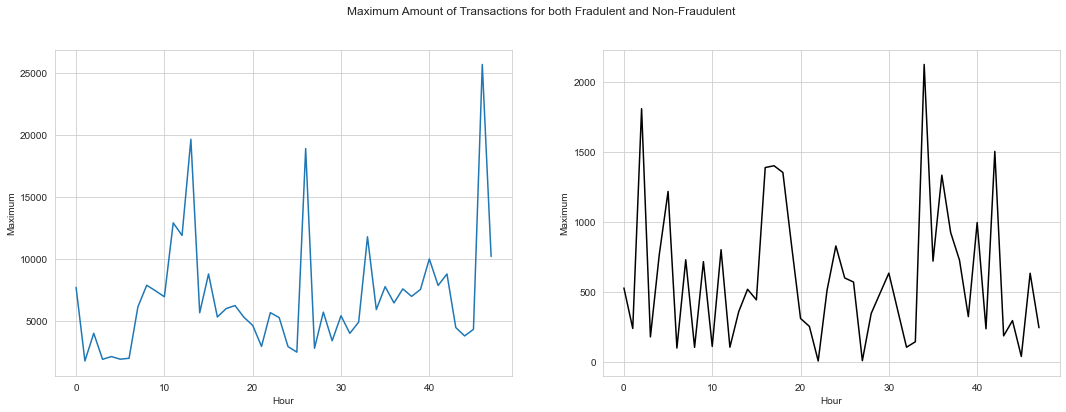

In [26]:
#plotting the Maximum amount of transactions
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Maximum", data=df_2.loc[df_2.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Maximum", data=df_2.loc[df_2.Class==1], color="black")
plt.suptitle("Maximum Amount of Transactions for both Fradulent and Non-Fraudulent")
plt.show();


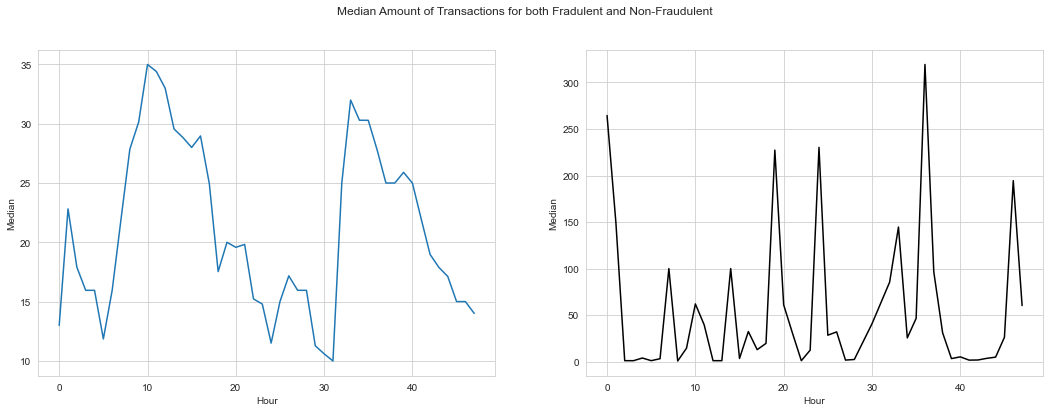

In [27]:
#plotting the median amount of transactions
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Median", data=df_2.loc[df_2.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Median", data=df_2.loc[df_2.Class==1], color="black")
plt.suptitle("Median Amount of Transactions for both Fradulent and Non-Fraudulent")
plt.show();

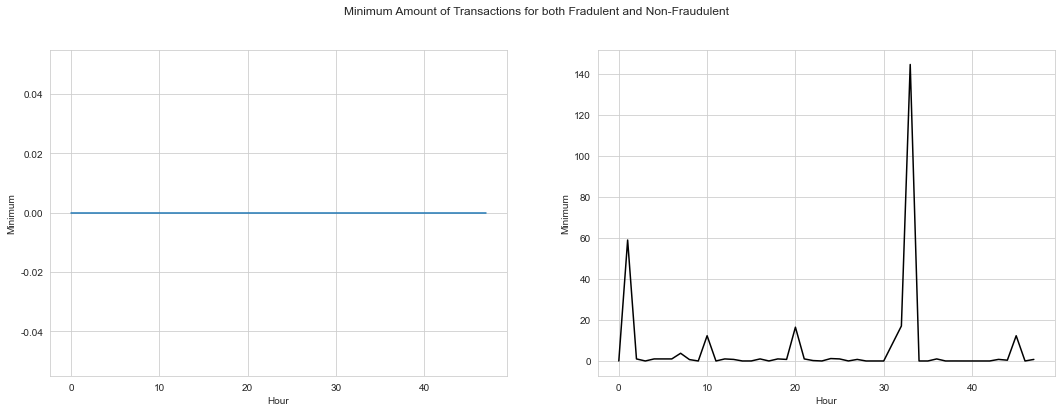

In [28]:
#plotting the minimum amount of transactions
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Minimum", data=df_2.loc[df_2.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Minimum", data=df_2.loc[df_2.Class==1], color="black")
plt.suptitle("Minimum Amount of Transactions for both Fradulent and Non-Fraudulent")
plt.show();

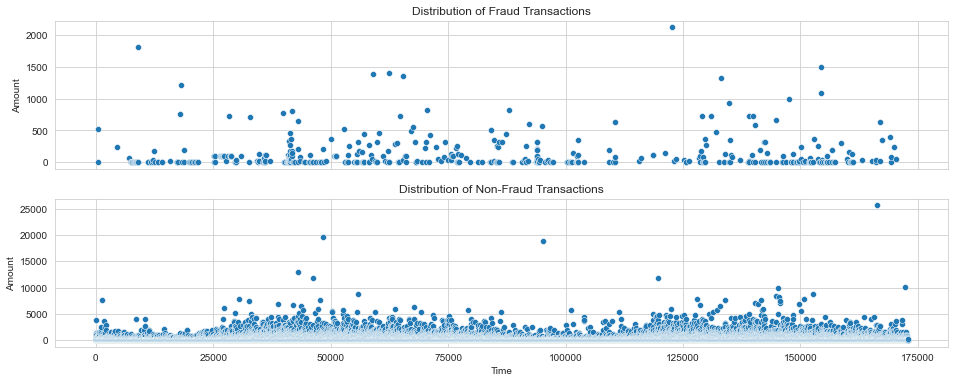

In [29]:
#scatter plot to show the distribution of fraud and non fraud transactions
fig, axs = plt.subplots(nrows=2,sharex=True,figsize=(16,6))

sns.scatterplot(x='Time',y='Amount', data=df[df['Class']==1], ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.scatterplot(x='Time',y='Amount', data=df[df['Class']==0], ax=axs[1])
axs[1].set_title("Distribution of Non-Fraud Transactions")

plt.show()

In [30]:
#splitting the dataset.
train_df, test_df = train_test_split(cleaned_df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('Class'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('Class'))
test_labels = np.array(test_df.pop('Class'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [31]:
#Normalize the input features using the sklearn StandardScaler. 
#This will set the mean to 0 and standard deviation to 1.
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (182276,)
Validation labels shape: (45569,)
Test labels shape: (56962,)
Training features shape: (182276, 33)
Validation features shape: (45569, 33)
Test features shape: (56962, 33)


In [32]:
pd.DataFrame(train_features)

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,-1.469203,-1.730540,1.708813,0.755637,-1.756612,0.494721,-0.180404,1.502141,-1.241245,4.887639,...,-0.554051,-1.008202,0.418558,1.041903,0.000702,-3.531121,-0.328668,-0.328668,-0.420560,-1.503443
1,0.836803,-0.719483,-0.752298,0.520857,-2.268929,0.578290,0.055015,-0.420761,0.099662,-1.984221,...,-0.666596,-0.640288,1.574014,-0.255711,-0.758057,0.779788,-0.257330,-0.257330,0.140944,0.846803
2,-0.342289,-0.602635,-0.975981,1.665389,-1.360602,-0.323454,1.444044,-1.173216,0.772864,-1.808697,...,0.315652,-1.723002,-0.268525,-0.107733,0.337411,0.217609,-0.026673,-0.026673,0.700222,-0.366228
3,1.271656,0.089795,0.621142,-0.462256,0.396301,0.822604,-0.992437,1.306391,-0.359113,-0.645396,...,-0.092818,-0.222383,-1.430867,-1.290480,0.618926,0.817017,-0.237559,-0.237559,0.224501,1.301689
4,-0.439384,0.647857,0.717457,-1.272444,0.950707,0.889180,-0.793193,0.484127,-0.115888,-0.473890,...,-0.526244,-1.396090,1.747374,-0.535197,0.072441,0.234558,-0.354164,-0.354164,-1.200691,-0.442042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182271,-1.499050,0.125784,-1.103720,0.587371,0.596884,-1.310768,-0.327059,-0.099769,-0.155944,2.092911,...,-0.538240,1.242812,-0.259858,1.824135,-0.380845,0.302302,1.699134,1.699134,1.566164,-1.503443
182272,-1.010124,-0.593610,-0.501382,0.890689,-0.443333,-0.680355,0.117719,0.587339,-0.272663,-1.284011,...,0.267185,0.426268,-0.493542,-0.278831,-0.225662,-0.349337,0.634612,0.634612,1.220040,-1.048557
182273,0.501655,0.435433,-0.295210,0.127117,-0.410381,0.387729,-0.929492,-1.714652,-0.594167,0.884675,...,-3.076110,0.338702,-3.850955,2.156958,1.097187,1.509257,-0.310257,-0.310257,-0.202331,0.467731
182274,-1.158955,-0.508861,0.109650,0.551106,-2.085983,0.745997,2.808852,-1.145588,1.348139,-0.945012,...,-0.640392,1.710107,1.100361,-0.189066,0.491293,0.203167,-0.360219,-0.360219,-3.249216,-1.124371


In [33]:
#defining the model
RF = RandomForestClassifier()

In [34]:
RF = RandomForestClassifier(n_estimators=50,  # number of trees in the forest
                             criterion='gini',  # quality of a split, can also be 'entropy'
                             max_depth=5,  # maximum depth of the tree, None means no limit
                             min_samples_split=5,  # minimum number of samples required to split a node
                             min_samples_leaf=1,  # minimum number of samples required at a leaf node
                             max_features='auto',  # number of features to consider for best split, can be int, float, 'auto', 'sqrt', 'log2' or None
                             bootstrap=True,  # whether bootstrap samples are used when building trees
                             oob_score=False,  # whether to use out-of-bag samples for a generalization error estimate
                             random_state=50,  # seed for random number generator
                             verbose=2,  # control the verbosity of the output
                             class_weight=None)  # weights associated with classes, can be 'balanced', 'balanced_subsample' or a dict

In [35]:
#oversampling on training data
print('Original dataset shape %s' % Counter(train_labels))

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(train_df,train_labels)

print('Resampled dataset shape %s' % Counter(y_train_ros))

Original dataset shape Counter({0: 181961, 1: 315})
Resampled dataset shape Counter({0: 181961, 1: 181961})


In [36]:
#oversampling on testing data
print('Original dataset shape %s' % Counter(test_labels))

ros = RandomOverSampler(random_state=42)
X_test_ros, y_test_ros = ros.fit_resample(test_df,test_labels)

print('Resampled dataset shape %s' % Counter(y_test_ros))

Original dataset shape Counter({0: 56873, 1: 89})
Resampled dataset shape Counter({0: 56873, 1: 56873})


In [37]:
#Using cross validation to find the best set of parameters for the random forest classifier
k_fold= KFold(n_splits=5, shuffle=True, random_state=50)

In [38]:
cv_scores = cross_val_score(RF,X_train_ros,y_train_ros , cv=k_fold, scoring='accuracy')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   28.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   27.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   28.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   28.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   28.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished


In [39]:
np.mean(cv_scores)

0.9628684216439638

In [40]:
cv_scores

array([0.96040393, 0.9635914 , 0.96500605, 0.96412673, 0.961214  ])

In [41]:
std_score = np.std(cv_scores)

In [42]:
std_score

0.0017599032517786307

In [43]:
# Training the model using Random Forest Classifier
RF = RandomForestClassifier()
RF.fit(X_train_ros, y_train_ros)

RandomForestClassifier()

In [44]:
#predicting the output
preds = RF.predict(X_test_ros)

0 0.837198670722487
1 0.8041161887011411
2 0.8873542805900867
3 0.8374536247428481
4 0.8762945510171787
5 0.8596697905860425
6 0.8821584934854853
7 0.8651820723366096
8 0.881991454644559
9 0.8705536898000809
10 0.8817716666959717
11 0.8643644611678653
12 0.870052573277302
13 0.870052573277302
14 0.8814200059782322
15 0.8757934344943998
16 0.8757934344943998
17 0.8703426933694371
18 0.8757934344943998
19 0.8646018321523394
20 0.8757934344943998
21 0.870052573277302
22 0.8816222108909324
23 0.8757934344943998
24 0.8872487823747648
25 0.8757934344943998
26 0.8816222108909324
27 0.8758813496738347
28 0.8758813496738347
29 0.8758813496738347
30 0.8813057162449669
31 0.8813057162449669
32 0.8865894185290032
33 0.8754769398484342
34 0.8870465774620646
35 0.8816222108909324
36 0.8870465774620646
37 0.8812178010655319
38 0.8870465774620646
39 0.8812178010655319
40 0.8812178010655319
41 0.870052573277302
42 0.8870465774620646
43 0.8754769398484342
44 0.8812178010655319
45 0.8700261987234716
46 0

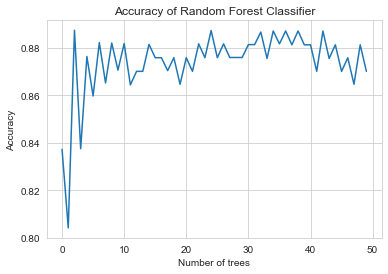

In [45]:
# Set the range of n_estimators values to test
n_estimators_range =50
n_estimators_range_array = np.arange(0, n_estimators_range)
# Initialize an empty list to store the accuracy scores
accuracy_scores = []

# Evaluate the accuracy of the classifier at each iteration
for n in range(n_estimators_range):
    RF = RandomForestClassifier(n_estimators=n+1, random_state=50)
    RF.fit(X_train_ros, y_train_ros)
    pred=RF.predict(X_test_ros)
    accuracy = accuracy_score(y_test_ros, pred)
    accuracy_scores.append(accuracy)
    print(n, accuracy)

# Plot the accuracy graph
plt.plot(n_estimators_range_array, accuracy_scores)
plt.xlabel("Number of trees")
plt.ylabel("Accuracy")
plt.title("Accuracy of Random Forest Classifier")
plt.show()

In [46]:
print(accuracy_scores)

[0.837198670722487, 0.8041161887011411, 0.8873542805900867, 0.8374536247428481, 0.8762945510171787, 0.8596697905860425, 0.8821584934854853, 0.8651820723366096, 0.881991454644559, 0.8705536898000809, 0.8817716666959717, 0.8643644611678653, 0.870052573277302, 0.870052573277302, 0.8814200059782322, 0.8757934344943998, 0.8757934344943998, 0.8703426933694371, 0.8757934344943998, 0.8646018321523394, 0.8757934344943998, 0.870052573277302, 0.8816222108909324, 0.8757934344943998, 0.8872487823747648, 0.8757934344943998, 0.8816222108909324, 0.8758813496738347, 0.8758813496738347, 0.8758813496738347, 0.8813057162449669, 0.8813057162449669, 0.8865894185290032, 0.8754769398484342, 0.8870465774620646, 0.8816222108909324, 0.8870465774620646, 0.8812178010655319, 0.8870465774620646, 0.8812178010655319, 0.8812178010655319, 0.870052573277302, 0.8870465774620646, 0.8754769398484342, 0.8812178010655319, 0.8700261987234716, 0.8757670599405694, 0.8646018321523394, 0.8812178010655319, 0.870052573277302]


In [49]:
#accuracy of the testing data

print(accuracy_score(y_test_ros, preds))

0.8870553689800081


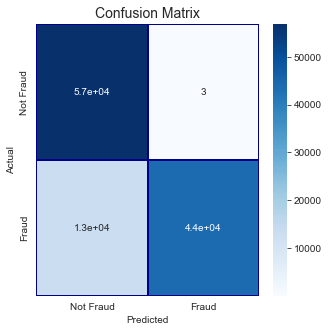

In [50]:
#Confusion Matrix
cm = pd.crosstab(y_test_ros, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [51]:
#printing the classification report
print(classification_report(y_test_ros, preds))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     56873
           1       1.00      0.77      0.87     56873

    accuracy                           0.89    113746
   macro avg       0.91      0.89      0.89    113746
weighted avg       0.91      0.89      0.89    113746



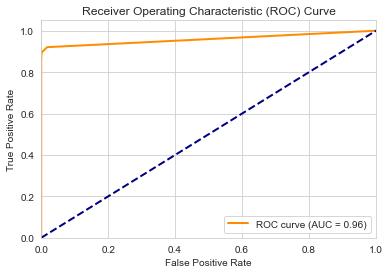

In [52]:
# Get the predicted probabilities for the positive class (1)
y_score = RF.predict_proba(X_test_ros)[:, 1]

# Geting the true positive rate (TPR) and false positive rate (FPR) for different thresholds
fpr, tpr, thresholds = roc_curve(y_test_ros, y_score)

# Getting the Area Under the ROC Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()








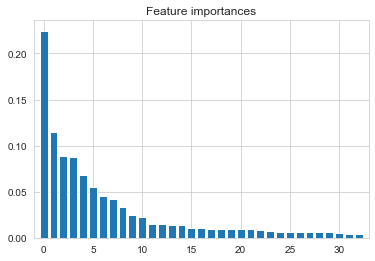

In [53]:
importances = RF.feature_importances_

# Sort the feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train_ros.shape[1]), importances[sorted_indices], align="center")
plt.xlim([-1, X_train_ros.shape[1]])
plt.show()